In [80]:
# import toytree
import numpy as np
import pandas as pd
import re
import dendropy
from itertools import groupby
from operator import itemgetter
import matplotlib.pylab as plt
from matplotlib.lines import Line2D
import matplotlib.colors as mcolors
import matplotlib.gridspec as gridspec

from Bio import SeqIO, AlignIO, Phylo

In [47]:
colors = list(mcolors.TABLEAU_COLORS.keys())

## Visualizing Deletions
The code blocks below should define the sequence of logical steps to generate visualizations of deletions that are identified from MSAs of consensus sequences. 

### TODO:
* classify each deletion as 
    * Highly Common ($\geq 5$ samples)
    * Common ($> 1$ and $< 5$ samples)
    * Unique ($1$ sample only)
* for each leaf in the tree
* identify if a deletion is present in the sample `is_deletion()`
    * identify the deletion that is present, prioritized by prevalence across samples
    * `which_deletion()`
    * annotate leaf with label/color that corresponds to the identified deletion
* repeat until all leafs have been visited 

In [48]:
# %load_ext rpy2.ipython

In [49]:
# %%R 

# library(ggplot2)
# library(ggtree)
# library(castor)
# library(TreeTools)

In [50]:
# %%R


# # setwd("")

# nwk <- (tree_path)
# tree <- read.tree(nwk)
# rtree <- tree.root(names=outgroup)
# # find_root(tree)
# # ggtree (tree)

In [51]:
# %%R
# outgroup = "NC_045512.2"
# tree2 = root_via_outgroup(tree, outgroup)
# tree2

In [52]:
# %%R
# tree2 = RootTree(tree, outgroup)
# tree2

In [53]:
# %%R 
# # find_root(tree2)

# ggtree (tree2)

In [54]:
# %%R 
# tree.tiplabels

# p <- ggtree(tree) + 
#   xlim(0, 0.025) + # to allow more space for labels
#   geom_treescale() # adds the scale

# p %<+% dd + 
#   geom_tiplab(aes(fill = factor(cat)),
#               color = "black", # color for label font
#               geom = "label",  # labels not text
#               label.padding = unit(0.15, "lines"), # amount of padding around the labels
#               label.size = 0) + # size of label border

#   theme(legend.position = c(0.5,0.2), 
#         legend.title = element_blank(), # no title
#         legend.key = element_blank()) # no keys

In [55]:
deletions_path = '/Users/al/Documents/scripps/data/deletion_results_v3.csv'
dels = pd.read_csv(deletions_path)
dels.head()

,deletion,samples,del_length,num_samples
0,"[28624, 28625, 28626, 28627, 28628, 28629, 286...",['SEARCH-2285' 'SEARCH-2286' 'SEARCH-2366' 'SE...,12,15
1,"[420, 421, 422, 423, 424, 425, 426, 427, 428]",['SEARCH-2420' 'SEARCH-2226' 'SEARCH-0264' 'SE...,9,13
2,[27526],['SEARCH-2199' 'SEARCH-2200' 'SEARCH-2208' 'SE...,1,5
3,"[29206, 29207, 29208, 29209, 29210, 29211]",['SEARCH-3149' 'SEARCH-3034' 'SEARCH-3129' 'SE...,6,5
4,"[25892, 25893, 25894, 25895]",['SEARCH-2948' 'SEARCH-2907' 'SEARCH-2953' 'SE...,4,5


In [56]:
# dels.dtypes

In [57]:
dels['samples'] = dels['samples'].apply(lambda x: x[1:-1].split())

In [58]:
# eval(dels['deletion'].values[0])

In [59]:
def get_deletion_coord(x):
    min_pos = np.min(eval(x))
    max_pos = np.max(eval(x))
    return f'{min_pos}:{max_pos}'
dels['deletion_id'] = dels['deletion'].apply(get_deletion_coord)

In [60]:
top_dels = dels.nlargest(10, 'num_samples')

In [61]:
top_dels = top_dels.loc[top_dels['del_length']>1]

In [62]:
# colors = ['red', 'yellow', 'green', 'blue', 'orange']

In [63]:
del2color = {}
for i, td in enumerate(top_dels.iterrows()):
#     print(td[1]['deletion_id'])
    deletion = td[1]['deletion_id']
    del2color[deletion] = colors[i]
del2color
#     print(td)

{'28624:28635': 'tab:blue',
 '420:428': 'tab:orange',
 '29206:29211': 'tab:green',
 '25892:25895': 'tab:red',
 '21725:21727': 'tab:purple',
 '27824:27829': 'tab:brown',
 '244:257': 'tab:pink'}

In [64]:
sample_colors = {}
for i, td in enumerate(top_dels.iterrows()):
#     print(td[1]['deletion_id'])
    deletion = td[1]['deletion_id']
    samples = td[1]['samples']
    for sample in samples:
#         print(eval(sample))
        sample_colors[eval(sample)] = del2color[deletion]
len(sample_colors)

49

In [65]:
# list(sample_colors.keys())

In [66]:
# sample_colors

In [67]:
del2color

{'28624:28635': 'tab:blue',
 '420:428': 'tab:orange',
 '29206:29211': 'tab:green',
 '25892:25895': 'tab:red',
 '21725:21727': 'tab:purple',
 '27824:27829': 'tab:brown',
 '244:257': 'tab:pink'}

In [68]:
legend_elements = [Line2D([0], [0], marker='o', color=x, label=y,
                          markerfacecolor=x, markersize=15) for y, x in del2color.items()]
legend_elements

In [69]:
# plt.ion()

## TODO:
* regenerate tree using matplotlib (use KGs script for reference)
* collapse branches

In [71]:
# plt.rcParams["figure.figsize"] = (20,350)

In [72]:
# fig = plt.figure()
# axes = fig.add_subplot(1, 1, 1)
# # axes.legend(handles=legend_elements)
# Phylo.draw(tree, label_colors=sample_colors, axes=axes, do_show=False)
# plt.savefig('deletion_tree.svg')
# plt.show()

In [136]:
tree_path = "/Users/al/Documents/scripps/data/aligned_seqs/2020-09-17_all_renamed_aligned_deduplicated.fa.treefile"

In [137]:
tree = next(Phylo.parse(tree_path, 'newick'))

In [138]:
tree.rooted

False

In [139]:
# root with genome from patient zero
root_name = 'NC_045512.2'
tree.root_with_outgroup(root_name)

In [140]:
tree.rooted

True

In [141]:
tree_str = tree.format('newick')

In [142]:
dtree = dendropy.Tree.get_from_string(
        tree_str[:-1],
        rooting="default-rooted",
        schema="newick")

In [143]:
for i in tree.get_nonterminals():
    print(i)

Clade
Clade
Clade
Clade
Clade
Clade
Clade
Clade
Clade
Clade
Clade
Clade
Clade
Clade
Clade
Clade
Clade
Clade
Clade
Clade
Clade
Clade
Clade
Clade
Clade
Clade
Clade
Clade
Clade
Clade
Clade
Clade
Clade
Clade
Clade
Clade
Clade
Clade
Clade
Clade
Clade
Clade
Clade
Clade
Clade
Clade
Clade
Clade
Clade
Clade
Clade
Clade
Clade
Clade
Clade
Clade
Clade
Clade
Clade
Clade
Clade
Clade
Clade
Clade
Clade
Clade
Clade
Clade
Clade
Clade
Clade
Clade
Clade
Clade
Clade
Clade
Clade
Clade
Clade
Clade
Clade
Clade
Clade
Clade
Clade
Clade
Clade
Clade
Clade
Clade
Clade
Clade
Clade
Clade
Clade
Clade
Clade
Clade
Clade
Clade
Clade
Clade
Clade
Clade
Clade
Clade
Clade
Clade
Clade
Clade
Clade
Clade
Clade
Clade
Clade
Clade
Clade
Clade
Clade
Clade
Clade
Clade
Clade
Clade
Clade
Clade
Clade
Clade
Clade
Clade
Clade
Clade
Clade
Clade
Clade
Clade
Clade
Clade
Clade
Clade
Clade
Clade
Clade
Clade
Clade
Clade
Clade
Clade
Clade
Clade
Clade
Clade
Clade
Clade
Clade
Clade
Clade
Clade
Clade
Clade
Clade
Clade
Clade
Clade
Clade
Clade
Clad

In [144]:
samples2ignore = []
deletion_samples = list(sample_colors.keys())
for i in tree.get_nonterminals():
    for j in i.clades:
        
        if prune_clade(j, deletion_samples):
            samples2ignore += [s.name for s in j.get_terminals()]

In [145]:
len([t.name for t in tree.get_terminals()])

1869

In [146]:
len(set(samples2ignore))

1820

In [147]:
# print(tree.as_ascii_plot())

In [148]:
# tree.retain_taxa_with_labels(deletion_samples + ['NC 045512.2'])

In [149]:
# with open('deletion_tree.treefile', 'w') as f:
#     f.write(tree.as_string('newick'))

In [150]:
type(tree)

Bio.Phylo.Newick.Tree

In [151]:
from io import StringIO

deletion_tree = Phylo.read('deletion_tree.treefile', "newick")
root_name = 'NC_045512.2'
deletion_tree.root_with_outgroup(root_name)
deletion_tree

Tree(rooted=True, weight=1.0)

In [152]:
def prune_clade(clade: Phylo.Newick.Clade, samples_of_interest: list) -> bool:
    sample_names = [leaf.name for leaf in clade.get_terminals()]
    common_names = set(sample_names) & set(samples_of_interest)
    if len(common_names) == 0:
        return True
    return False

In [153]:
prune_samples = set()
for clade in tree.get_nonterminals():
    if prune_clade(clade, deletion_samples):
        prune_samples.update([leaf for leaf in clade.get_terminals()])
print(len(prune_samples))

1462


In [154]:
for sample in prune_samples:
    tree.prune(sample)

In [155]:
tree

Tree(rooted=True, weight=1.0)

In [156]:
def get_coords(tree):
    for _i, i in enumerate(tree.get_terminals()):
        i.y = _i
        i.x = tree.distance(i)

    for i in reversed(tree.get_nonterminals()):
        _ = i.clades
        i.y = (_[0].y + _[-1].y)/2
        i.x = tree.distance(i)
    return tree

In [157]:
tree = get_coords(tree)

In [158]:
plt.rcParams["figure.figsize"] = (40,100)

In [160]:
len(tree.get_terminals())

407

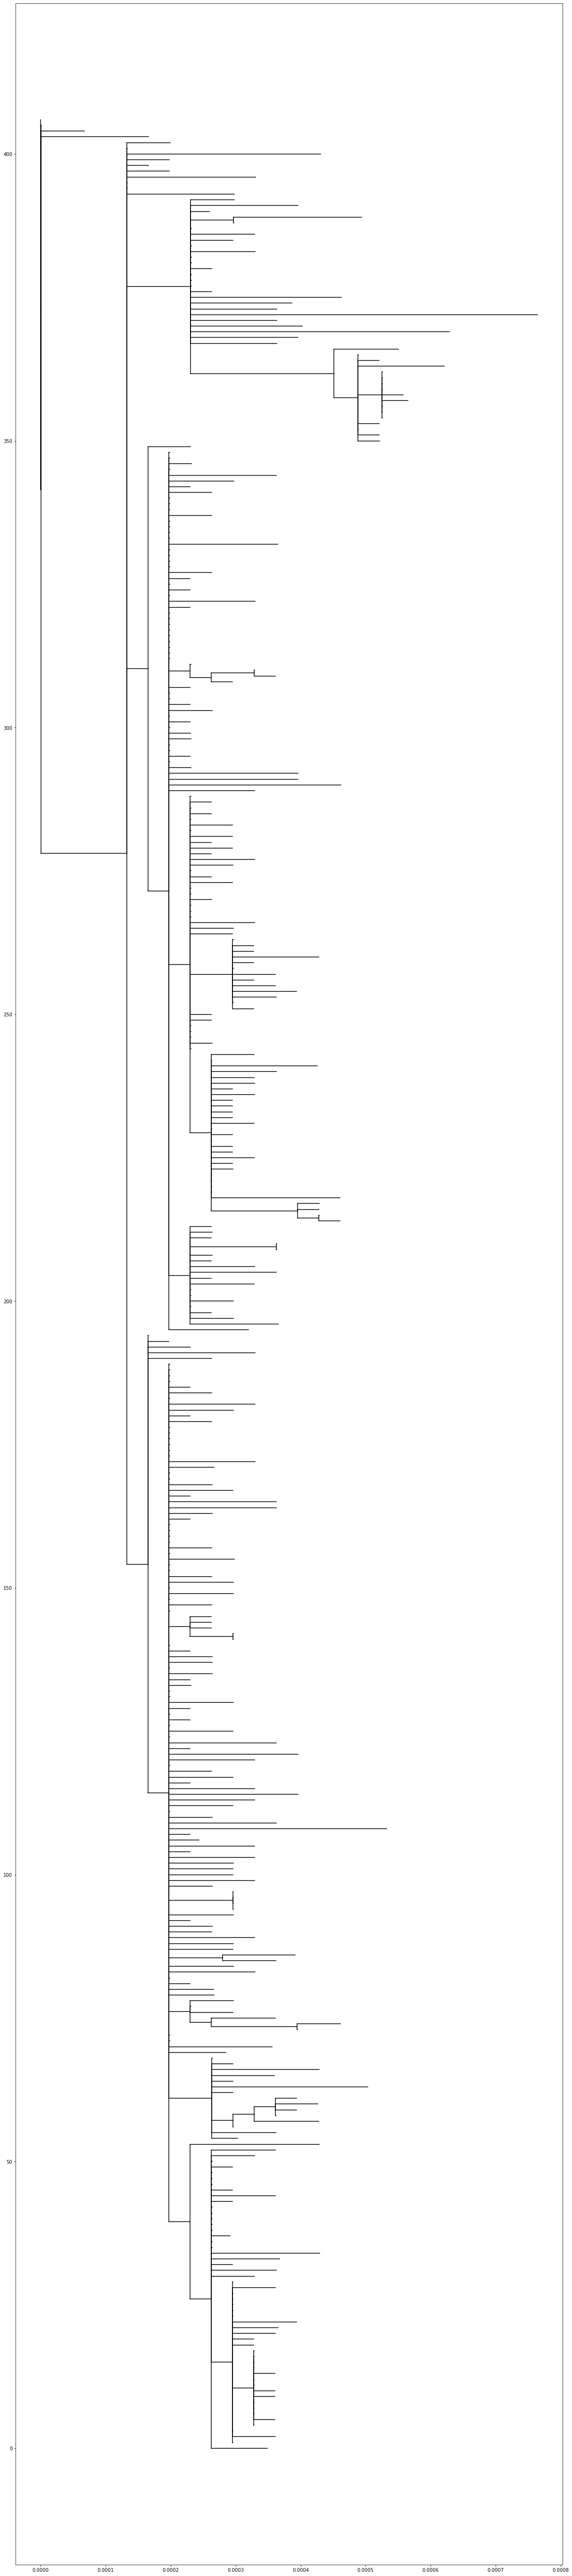

In [159]:
f = plt.figure()
gs = gridspec.GridSpec(2, 2, width_ratios=[1,0.75], height_ratios = [0.5,0.5])

ax = plt.subplot(gs[:,0])
for i in tree.get_nonterminals():
    for j in i.clades:
#         if prune_clade(j, deletion_samples): continue
        _t = ax.plot([i.x, i.x], [i.y, j.y], ls='-', color="#000000", zorder = 1)
        _t = ax.plot([i.x, j.x], [j.y, j.y], ls='-', color="#000000", zorder = 1)

In [94]:
len(sample_colors.keys())

49

In [95]:
deletion_samples = list(sample_colors.keys())
# prune_clade(clade, deletion_samples)

In [96]:
# clade

In [97]:
plt.rcParams["figure.figsize"] = (20,250)

In [98]:
tree = get_coords(tree)

In [99]:
samples = [s.name for s in tree.get_terminals()]

In [100]:
samples2ignore = set(samples) - set(deletion_samples)

In [102]:
deletion_tree = get_coords(deletion_tree)

In [103]:
plt.rcParams["figure.figsize"] = (30,30)

##TODO:
* collapsed branches (as terminal nodes) showing number of samples not shown

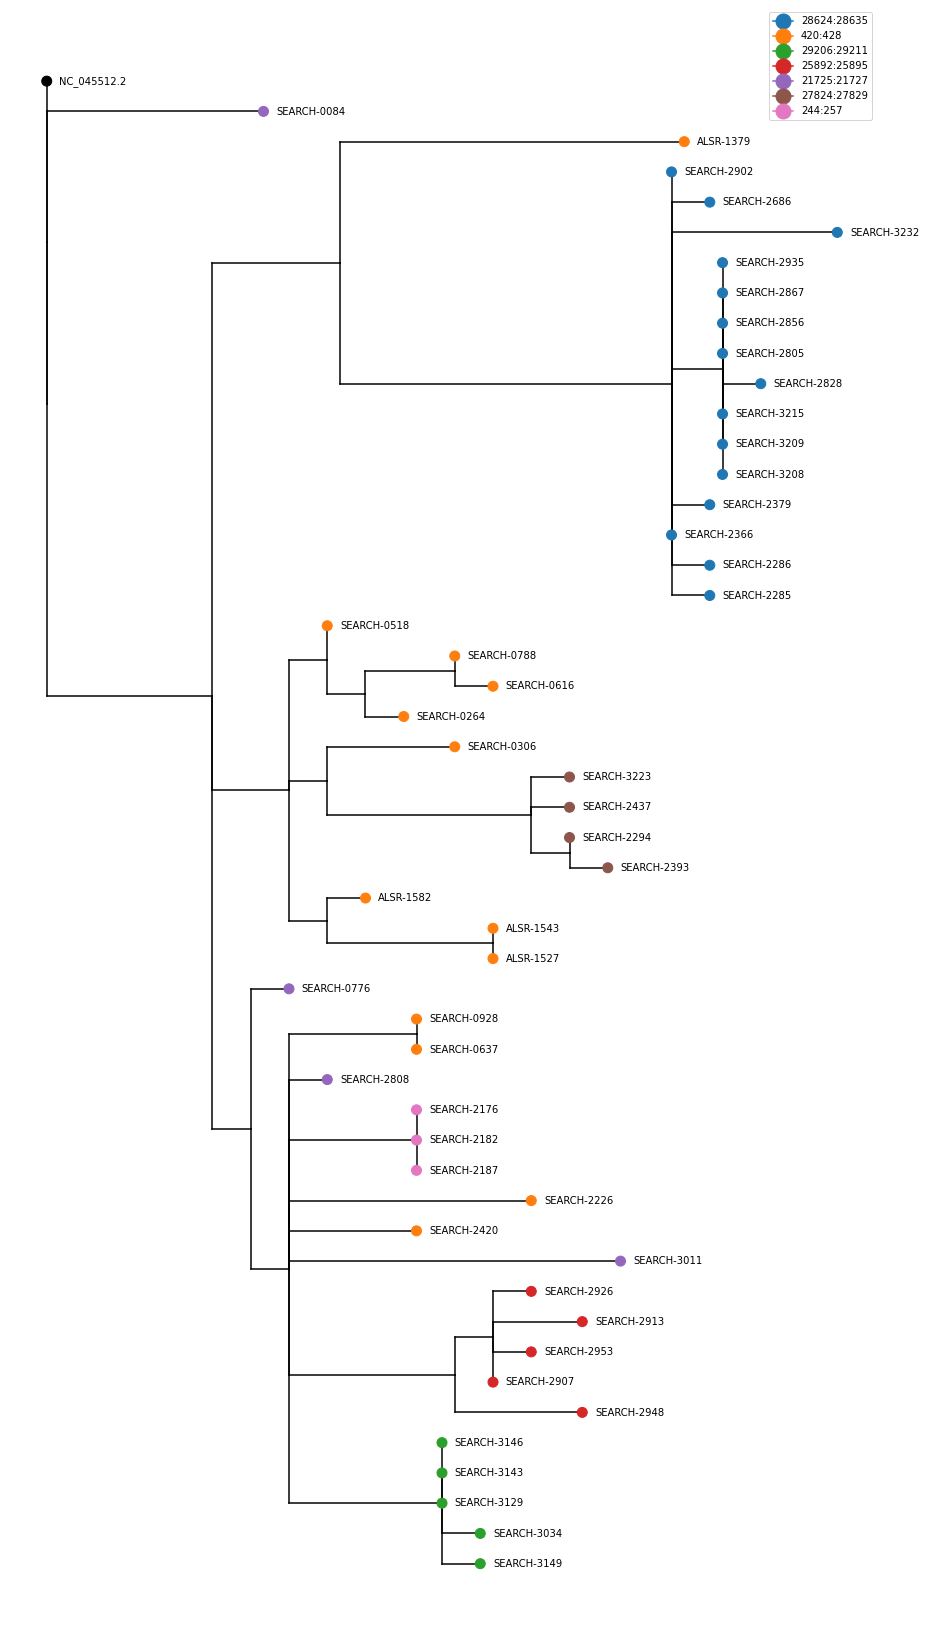

In [104]:
f = plt.figure()
gs = gridspec.GridSpec(2, 2, width_ratios=[1,0.75], height_ratios = [0.5,0.5])

ax = plt.subplot(gs[:,0])
for i in deletion_tree.get_nonterminals():
    for j in i.clades:
        _t = ax.plot([i.x, i.x], [i.y, j.y], ls='-', color="#000000", zorder = 1)
        _t = ax.plot([i.x, j.x], [j.y, j.y], ls='-', color="#000000", zorder = 1)

_ = {
    "x": [],
    "y": [],
    "c": []
}
for i in deletion_tree.get_terminals():
    _["x"].append(i.x)
    _["y"].append(i.y)
    _["c"].append(sample_colors.get(i.name, 'black'))
    
    ax.text(i.x+1e-5, i.y-1e-1, i.name)
#     _["c"].append(c)
    # ax.text(i.x+0.001, i.y, i.name.split("_")[3])
    # if i.name in hp["taxon name"].tolist():
    #     ax.text(i.x + 0.000025, i.y, i.name.split("_")[0] + " " + str(hp[hp["taxon name"] == i.name]["#of homoplasic mutations"].values[0]))
# ax.text(_["x"], _["y"], _["text"])
ax.scatter(_["x"], _["y"], c = _["c"], s = 100, zorder = 2)
ax.scatter(_["x"], _["y"], c = _["c"], s = 50, zorder = 2)
ax.legend(handles=legend_elements)
f.patch.set_visible(False)
ax.axis('off')
plt.show()

In [14]:
tree = toytree.tree(tree_path)

In [15]:
rtree = tree.root(names='NC_045512.2')

In [69]:
toytree.colors

['rgba(40.0%,76.1%,64.7%,1.000)',
 'rgba(98.8%,55.3%,38.4%,1.000)',
 'rgba(55.3%,62.7%,79.6%,1.000)',
 'rgba(90.6%,54.1%,76.5%,1.000)',
 'rgba(65.1%,84.7%,32.9%,1.000)',
 'rgba(100.0%,85.1%,18.4%,1.000)',
 'rgba(89.8%,76.9%,58.0%,1.000)',
 'rgba(70.2%,70.2%,70.2%,1.000)']

In [17]:
# rtree.get_tip_labels()

In [43]:
# dir(rtree)

In [19]:
rtree.draw(tip_labels_align=False, height=5000, 
           layout='c')

(<toyplot.canvas.Canvas at 0x7fc6f518b100>,
 <toytree.Render.ToytreeMark at 0x7fc6f837b820>)

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="5000.0px" height="5000.0px" viewBox="0 0 5000.0 5000.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="tc073a554956a47c99074acbed3fcbfc6"> <path d="M 2764.0 1737.8 L 2760.4 1748.0 A 795.9 795.9 0 0 1 2764.4 1740.5" id=

In [26]:
(dels.explode('samples')
 .groupby('samples')
 .agg(dels=('deletion_id', 'unique'), 
      num_dels=('deletion_id', 'nunique'))
 .sort_values('num_dels', ascending=False))

,dels,num_dels
samples,,
'SEARCH-2187',"[178:178, 244:257, 1338:1338]",3
'SEARCH-2731',"[21893:21895, 242:256, 10102:10102]",3
'SEARCH-2438',"[23745:23760, 23585:23585, 22618:22621]",3
'SEARCH-2442',"[29329:29347, 29174:29195]",2
'SEARCH-2532',"[17079:17083, 16935:16953]",2
...,...,...
'SEARCH-0928',[420:428],1
'SEARCH-0854',[3065:3082],1
'SEARCH-0851',[13345:13346],1


In [27]:
print(dels.explode('samples').shape)
print(dels.explode('samples')['samples'].value_counts()[:14])

(147, 5)
'SEARCH-2438'    3
'SEARCH-2187'    3
'SEARCH-2731'    3
'SEARCH-2226'    2
'SEARCH-2626'    2
'SEARCH-2442'    2
'SEARCH-3109'    2
'SEARCH-2469'    2
'SEARCH-0142'    2
'SEARCH-2532'    2
'SEARCH-0068'    2
'SEARCH-2176'    2
'SEARCH-2182'    2
'SEARCH-2200'    1
Name: samples, dtype: int64


## Identifying Deletions 
The code blocks below define the sequence of logical steps to identify common deletions from a MSA of consensus sequences from different samples.

In [2]:
filepath = "/Users/alaa/Documents/scripps/data/aligned_seqs/2020-09-17_all_renamed_aligned_deduplicated.fa"

In [3]:
# %debug
d = AlignIO.read(filepath, 'fasta')
seqs = {}
for row in d:
    sample_idx = str(row.id)
    s = str(row.seq)
    seqs[sample_idx] = s[265:29674]
len(seqs)

1869

In [4]:
len(str(row.seq)[265:29674])

29409

In [5]:
row.id

'SEARCH-1715'

In [6]:
1896*30000

56880000

In [7]:
seqsdf = (pd.DataFrame(index=seqs.keys(), data=seqs.values(), columns=['sequence'])
            .reset_index().rename(columns={'index': 'idx'}))

In [8]:
seqsdf.head()

,idx,sequence
0,NC_045512.2,atggagagccttgtccctggtttcaacgagaaaacacacgtccaac...
1,SEARCH-1988,atggagagccttgtccctggtttcaacgagaaaacacacgtccaac...
2,SEARCH-1989,atggagagccttgtccctggtttcaacgagaaaacacacgtccaac...
3,SEARCH-1990,atggagagccttgtccctggtttcaacgagaaaacacacgtccaac...
4,SEARCH-1991,atggagagccttgtccctggtttcaacgagaaaacacacgtccaac...


In [9]:
print(seqsdf.shape)
seqsdf['seq_len'] = seqsdf['sequence'].str.len()
print(seqsdf['seq_len'].unique())
seqsdf.head()

(1869, 2)
[29409]


,idx,sequence,seq_len
0,NC_045512.2,atggagagccttgtccctggtttcaacgagaaaacacacgtccaac...,29409
1,SEARCH-1988,atggagagccttgtccctggtttcaacgagaaaacacacgtccaac...,29409
2,SEARCH-1989,atggagagccttgtccctggtttcaacgagaaaacacacgtccaac...,29409
3,SEARCH-1990,atggagagccttgtccctggtttcaacgagaaaacacacgtccaac...,29409
4,SEARCH-1991,atggagagccttgtccctggtttcaacgagaaaacacacgtccaac...,29409


In [10]:
def find_del_positions(x):
    return [m.start() for m in re.finditer('-', x)]

def find_deletions(x):
    del_positions = [m.start() for m in re.finditer('-', x)]
    return [list(map(itemgetter(1), g)) for k, g in groupby(enumerate(del_positions), 
                                                            lambda x: x[0]-x[1])]

In [11]:
seqsdf['del_positions'] = seqsdf['sequence'].apply(find_deletions)
del_seqs = seqsdf.loc[seqsdf['del_positions'].str.len() > 0]

In [12]:
del_seqs.columns

Index(['idx', 'sequence', 'seq_len', 'del_positions'], dtype='object')

In [13]:
del_seqs = del_seqs.explode('del_positions')
del_seqs.head()

,idx,sequence,seq_len,del_positions
8,SEARCH-2413,atggagagccttgtccctggtttcaacgagaaaacacacgtccaac...,29409,[8606]
9,SEARCH-2418,atggagagccttgtccctggtttcaacgagaaaacacacgtccaac...,29409,[22751]
12,SEARCH-2311,atggagagccttgtccctggtttcaacgagaaaacacacgtccaac...,29409,[4499]
13,SEARCH-2469,atggagagccttgtccctggtttcaacgagaaaacacacgtccaac...,29409,[13719]
13,SEARCH-2469,atggagagccttgtccctggtttcaacgagaaaacacacgtccaac...,29409,[13727]


In [14]:
def cross_join(df1: pd.DataFrame, df2: pd.DataFrame) -> pd.DataFrame:
    df1 = df1.assign(key=0)
    df2 = df2.assign(key=0)
    return pd.merge(df1, df2, on='key').drop(columns='key')

def is_deletion_common(x):
    return x['del_positions_x']==x['del_positions_y']

In [15]:
del_matrix = cross_join(del_seqs[['idx', 'del_positions']], del_seqs[['idx', 'del_positions']])
del_matrix['common_deletion'] = del_matrix.apply(is_deletion_common, axis=1)
del_matrix['del_length'] = del_matrix['del_positions_x'].str.len()
del_filter = ((del_matrix['common_deletion']==True) & 
              (del_matrix['del_length']>0))
#               & 
#               (del_matrix['idx_x']!=del_matrix['idx_y']))
del_matrix = del_matrix.loc[del_filter]

In [16]:
print(del_matrix.shape)
del_matrix.head()

(643, 6)


,idx_x,del_positions_x,idx_y,del_positions_y,common_deletion,del_length
0,SEARCH-2413,[8606],SEARCH-2413,[8606],True,1
148,SEARCH-2418,[22751],SEARCH-2418,[22751],True,1
296,SEARCH-2311,[4499],SEARCH-2311,[4499],True,1
444,SEARCH-2469,[13719],SEARCH-2469,[13719],True,1
592,SEARCH-2469,[13727],SEARCH-2469,[13727],True,1


In [17]:
del_matrix['deletion'] = del_matrix['del_positions_x'].astype(str)
ans = (del_matrix.groupby('deletion')
       .agg(samples=('idx_x', 'unique'), 
            del_length=('del_length', 'mean'))
       .reset_index())
ans['num_samples'] = ans['samples'].str.len()
ans.sort_values('num_samples', ascending=False, inplace=True)

In [18]:
ans.shape

(86, 4)

In [19]:
ans

,deletion,samples,del_length,num_samples
65,"[28624, 28625, 28626, 28627, 28628, 28629, 286...","[SEARCH-2285, SEARCH-2286, SEARCH-2366, SEARCH...",12,15
74,"[420, 421, 422, 423, 424, 425, 426, 427, 428]","[SEARCH-2420, SEARCH-2226, SEARCH-0264, SEARCH...",9,13
59,[27526],"[SEARCH-2199, SEARCH-2200, SEARCH-2208, SEARCH...",1,5
68,"[29206, 29207, 29208, 29209, 29210, 29211]","[SEARCH-3149, SEARCH-3034, SEARCH-3129, SEARCH...",6,5
42,"[25892, 25893, 25894, 25895]","[SEARCH-2948, SEARCH-2907, SEARCH-2953, SEARCH...",4,5
...,...,...,...,...
28,"[23577, 23578]",[SEARCH-2155],2,1
27,"[23289, 23290, 23291, 23292, 23293, 23294, 232...",[ALSR-1679],28,1
26,[22751],[SEARCH-2418],1,1
25,"[22618, 22619, 22620, 22621]",[SEARCH-2438],4,1


In [109]:
ans.to_csv('/Users/alaa/Documents/scripps/data/deletion_results_v3.csv', index=False)
ans.to_excel('/Users/alaa/Documents/scripps/data/deletion_results_v3.xlsx', index=False)

In [42]:
for i in range(33):
    num_samples = ans2.iloc[i, :]['num_samples']
    samples = ans2.iloc[i, :]['samples']
    deletion = ans2.iloc[i, :]['common_del_positions']
    
    print(num_samples, deletion, samples)
    print('\n')

15 [28624, 28625, 28626, 28627, 28628, 28629, 28630, 28631, 28632, 28633, 28634, 28635] ['SEARCH-3208' 'SEARCH-2902' 'SEARCH-3209' 'SEARCH-2856' 'SEARCH-2805'
 'SEARCH-2828' 'SEARCH-2686' 'SEARCH-3215' 'SEARCH-3232' 'SEARCH-2286'
 'SEARCH-2366' 'SEARCH-2379' 'SEARCH-2285' 'SEARCH-2867' 'SEARCH-2935']


13 [420, 421, 422, 423, 424, 425, 426, 427, 428] ['SEARCH-0637' 'SEARCH-0616' 'SEARCH-0306' 'SEARCH-0264' 'SEARCH-0518'
 'ALSR-1527' 'ALSR-1543' 'ALSR-1379' 'SEARCH-0928' 'SEARCH-2226'
 'SEARCH-0788' 'ALSR-1582' 'SEARCH-2420']


9 [252, 253, 254] ['SEARCH-2176' 'SEARCH-2731' 'SEARCH-0979' 'SEARCH-2611' 'SEARCH-0491'
 'SEARCH-2187' 'SEARCH-2182' 'SEARCH-0007' 'SEARCH-0438']


8 [249, 250, 251, 252, 253, 254] ['SEARCH-2187' 'SEARCH-2731' 'SEARCH-2611' 'SEARCH-0438' 'SEARCH-0491'
 'SEARCH-2176' 'SEARCH-2182' 'SEARCH-0007']


7 [244, 245, 246, 247, 248, 249, 250, 251, 252] ['SEARCH-0174' 'SEARCH-0320' 'SEARCH-0491' 'SEARCH-2176' 'SEARCH-2187'
 'SEARCH-2182' 'SEARCH-2731']


7 [25892, 25893, 